In [ ]:
# creating vocabulary consumes space
# similar sentences might have very differr vectors 

# word embedding adress the above 2 shortcomings

In [ ]:
# techniques ->

# word2vec         GloVe            fastText
# BERT             GPT
# ELMo

In [ ]:
# word2vec -> airthmetic on words : eg- King-man+woman = queen 
# vector for each word using differ attributes
# cbow , skipgram 
# technique used on differ datasets
# BERT -> differ variations 

In [ ]:
# whole idea of all techniques is to convert word to vectors
# or convert sentence to vector OR paragraph to vector

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [ ]:
doc = nlp("dog cat banana sjchcgbxb")
for token in doc:
  print(token.text,token.has_vector,token.is_oov)

dog True False
cat True False
banana True False
sjchcgbxb False True


In [ ]:
# out of vocab (oov) is true for random word
doc[0].vector

array([ 1.2330e+00,  4.2963e+00, -7.9738e+00, -1.0121e+01,  1.8207e+00,
        1.4098e+00, -4.5180e+00, -5.2261e+00, -2.9157e-01,  9.5234e-01,
        6.9880e+00,  5.0637e+00, -5.5726e-03,  3.3395e+00,  6.4596e+00,
       -6.3742e+00,  3.9045e-02, -3.9855e+00,  1.2085e+00, -1.3186e+00,
       -4.8886e+00,  3.7066e+00, -2.8281e+00, -3.5447e+00,  7.6888e-01,
        1.5016e+00, -4.3632e+00,  8.6480e+00, -5.9286e+00, -1.3055e+00,
        8.3870e-01,  9.0137e-01, -1.7843e+00, -1.0148e+00,  2.7300e+00,
       -6.9039e+00,  8.0413e-01,  7.4880e+00,  6.1078e+00, -4.2130e+00,
       -1.5384e-01, -5.4995e+00,  1.0896e+01,  3.9278e+00, -1.3601e-01,
        7.7732e-02,  3.2218e+00, -5.8777e+00,  6.1359e-01, -2.4287e+00,
        6.2820e+00,  1.3461e+01,  4.3236e+00,  2.4266e+00, -2.6512e+00,
        1.1577e+00,  5.0848e+00, -1.7058e+00,  3.3824e+00,  3.2850e+00,
        1.0969e+00, -8.3711e+00, -1.5554e+00,  2.0296e+00, -2.6796e+00,
       -6.9195e+00, -2.3386e+00, -1.9916e+00, -3.0450e+00,  2.48

In [ ]:
doc[0].vector.shape

(300,)

In [ ]:
base_token = nlp("bread")
base_token.vector.shape

(300,)

In [ ]:
doc = nlp("sandwich burger car tiger human wheat")
# similarity bw sandwich burger and bread should be high
for token in doc :
  print(f"{token.text} <-> {base_token.text}:" , token.similarity(base_token))

sandwich <-> bread: 0.6341067010130894
burger <-> bread: 0.47520687769584247
car <-> bread: 0.06451533308853552
tiger <-> bread: 0.04764611675903374
human <-> bread: 0.2151154210812192
wheat <-> bread: 0.6150360888607199


In [ ]:
# as get closer to 1 -> more similar 
# meaning of similarty -> words are used in similar context -> example : profit,loss
def print_similarity(base_word,words_to_compare):
  base_token = nlp(base_word)
  doc = nlp(words_to_compare)
  for token in doc:
    print(f"{token.text} <-> {base_token.text}:" , token.similarity(base_token))

In [ ]:
print_similarity("iphone","apple ,samsung,youtube,cricket")

apple <-> iphone: 0.4387907401919904
, <-> iphone: 0.014359512873306524
samsung <-> iphone: 0.670859081425417
, <-> iphone: 0.014359512873306524
youtube <-> iphone: 0.4309647385998661
, <-> iphone: 0.014359512873306524
cricket <-> iphone: 0.06341493830031358


In [ ]:
king = nlp.vocab["king"].vector
man = nlp.vocab["man"].vector
woman = nlp.vocab["woman"].vector
queen = nlp.vocab["queen"].vector
result = king - man + woman

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([result], [queen])

array([[0.61780137]], dtype=float32)

In [ ]:
import pandas as pd
df = pd.read_csv("fake_or_real_news.csv",engine="python",error_bad_lines=False)

<ipython-input-19-c00b00b700c9>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("fake_or_real_news.csv",engine="python",error_bad_lines=False)


In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df_=df.drop(['title','Unnamed: 0'],axis=1)

In [ ]:
df_.shape

(6335, 3)

In [ ]:
df_.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [ ]:
# balanced dataset
df_['label_']=df_['label'].map({'FAKE':0,'REAL':1})

In [ ]:
df_final=df_.drop(['label'],axis=1)

In [ ]:
df_final.head()

,text,label_
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1


In [ ]:
# apply word2vec on each row in text col
df_final['vector']=df['text'].apply(lambda x : nlp(x).vector)

In [ ]:
df_final.head()

,text,label_,vector
0,"Daniel Greenfield, a Shillman Journalism Fello...",0,"[-1.3751823, 1.3421849, -2.3666484, 0.12908486..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,"[-1.7449774, 0.93961924, -2.024867, 0.42536643..."
2,U.S. Secretary of State John F. Kerry said Mon...,1,"[-1.9426425, 1.0062195, -1.9992222, 0.20469022..."
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,"[-1.9125352, -0.1481846, -1.1432766, 0.6861217..."
4,It's primary day in New York and front-runners...,1,"[-1.8516092, 1.3163909, -2.1726575, 1.2286776,..."


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final.vector.values, df_final.label_, test_size=0.2, random_state=51)

In [ ]:
X_train

array([array([-1.43912745e+00,  1.04403555e+00, -1.43774247e+00,  4.48632270e-01,
               4.04274940e+00,  4.50091779e-01,  5.68367004e-01,  4.02366495e+00,
              -8.55758369e-01, -1.19812393e+00,  5.35979080e+00,  1.31302571e+00,
              -3.18560386e+00,  1.03715241e+00,  6.06318772e-01,  1.59066069e+00,
               6.90424383e-01,  1.67503767e-02, -1.08400476e+00, -8.21604490e-01,
               7.90713966e-01, -3.79960150e-01, -1.35397065e+00, -4.92445022e-01,
              -6.82762682e-01, -1.38891280e+00, -1.45744169e+00, -1.08699608e+00,
              -2.30993748e-01,  8.85327697e-01,  7.64005542e-01, -1.85499236e-01,
              -9.28330004e-01, -1.40800178e+00, -2.23732042e+00, -6.16078556e-01,
              -5.53457201e-01,  6.07449114e-01,  1.40692711e+00,  5.73823929e-01,
               1.85379252e-01,  1.21078178e-01, -2.63683982e-02,  7.49444485e-01,
              -1.12400115e+00,  1.07275522e+00,  4.83317256e-01, -2.29664016e+00,
              -7

In [ ]:
X_train

array([array([-1.43912745e+00,  1.04403555e+00, -1.43774247e+00,  4.48632270e-01,
               4.04274940e+00,  4.50091779e-01,  5.68367004e-01,  4.02366495e+00,
              -8.55758369e-01, -1.19812393e+00,  5.35979080e+00,  1.31302571e+00,
              -3.18560386e+00,  1.03715241e+00,  6.06318772e-01,  1.59066069e+00,
               6.90424383e-01,  1.67503767e-02, -1.08400476e+00, -8.21604490e-01,
               7.90713966e-01, -3.79960150e-01, -1.35397065e+00, -4.92445022e-01,
              -6.82762682e-01, -1.38891280e+00, -1.45744169e+00, -1.08699608e+00,
              -2.30993748e-01,  8.85327697e-01,  7.64005542e-01, -1.85499236e-01,
              -9.28330004e-01, -1.40800178e+00, -2.23732042e+00, -6.16078556e-01,
              -5.53457201e-01,  6.07449114e-01,  1.40692711e+00,  5.73823929e-01,
               1.85379252e-01,  1.21078178e-01, -2.63683982e-02,  7.49444485e-01,
              -1.12400115e+00,  1.07275522e+00,  4.83317256e-01, -2.29664016e+00,
              -7

In [ ]:
# classifier needs 2d numpy arr
# stack fn ->
# stack() is used for joining multiple NumPy arrays. Unlike, concatenate(), it joins arrays along a new axis. It returns a NumPy array.
# to join 2 arrays, they must have the same shape and dimensions. (e.g. both (2,3)–> 2 rows,3 columns)
# stack() creates a new array which has 1 more dimension than the input arrays. If we stack 2 1-D arrays, the resultant array will have 2 dimensions.

In [ ]:
import numpy as np
x_train_2d = np.stack(X_train)
x_test_2d = np.stack(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
clf = MultinomialNB()
# remove negative values
scaler = MinMaxScaler()
scaled_trin_embed = scaler.fit_transform(x_train_2d)
scaled_test_embed = scaler.transform(x_test_2d)
clf.fit(scaled_trin_embed,y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(scaled_test_embed)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       629
           1       0.73      0.84      0.78       638

    accuracy                           0.76      1267
   macro avg       0.77      0.76      0.76      1267
weighted avg       0.77      0.76      0.76      1267



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
clf.fit(x_train_2d,y_train)
y_pred_ = clf.predict(x_test_2d)
print(classification_report(y_test,y_pred_))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       629
           1       0.81      0.92      0.86       638

    accuracy                           0.85      1267
   macro avg       0.86      0.85      0.85      1267
weighted avg       0.86      0.85      0.85      1267



In [ ]:
# knn works well with dense data due to vectors

***Gensim -> for word2vec***

In [ ]:
import gensim.downloader as api
wv = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
wv.similarity(w1="great",w2="well")

0.4098271

In [ ]:
 wv.most_similar("good")

[('great', 0.7291510105133057),
 ('bad', 0.7190051078796387),
 ('terrific', 0.6889115571975708),
 ('decent', 0.6837348341941833),
 ('nice', 0.6836092472076416),
 ('excellent', 0.644292950630188),
 ('fantastic', 0.6407778263092041),
 ('better', 0.6120728850364685),
 ('solid', 0.5806034803390503),
 ('lousy', 0.576420247554779)]

In [ ]:
# similar doesnt mean language synonym 
wv.most_similar(positive=["france","berlin"],negative=["paris"])
# subtracting capital from country and adding other capital

[('germany', 0.5094343423843384),
 ('european', 0.48650455474853516),
 ('german', 0.4714890420436859),
 ('austria', 0.46964022517204285),
 ('swedish', 0.4645182490348816),
 ('Wissenschaft', 0.4532880485057831),
 ('denmark', 0.4477355182170868),
 ('München', 0.4438532590866089),
 ('europe', 0.4420619308948517),
 ('belgium', 0.43769752979278564)]

In [ ]:
wv.doesnt_match(["dog","cat","burger"])

'burger'

In [ ]:
glv = api.load("glove-twitter-25")

[================================================--] 97.4% 102.1/104.8MB downloaded


In [ ]:
glv.doesnt_match("banana grapes orange lion".split())

'lion'

In [ ]:
def preprocess_and_vec(text):
  doc = nlp(text)
  filtered_tokens = []
  for token in doc :
    if token.is_punct or token.is_stop :
      continue
    filtered_tokens.append(token.lemma_)
  return wv.get_mean_vector(filtered_tokens)

In [ ]:
df_final.head()

,text,label_,vector
0,"Daniel Greenfield, a Shillman Journalism Fello...",0,"[-1.3751823, 1.3421849, -2.3666484, 0.12908486..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,"[-1.7449774, 0.93961924, -2.024867, 0.42536643..."
2,U.S. Secretary of State John F. Kerry said Mon...,1,"[-1.9426425, 1.0062195, -1.9992222, 0.20469022..."
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,"[-1.9125352, -0.1481846, -1.1432766, 0.6861217..."
4,It's primary day in New York and front-runners...,1,"[-1.8516092, 1.3163909, -2.1726575, 1.2286776,..."


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df_final = df_final.drop(['vector'],axis=1)

In [ ]:
df_final['vector']=df_final['text'].apply(lambda text: preprocess_and_vec(text))

In [ ]:
df_final.head()

,text,label_,vector
0,"Daniel Greenfield, a Shillman Journalism Fello...",0,"[0.024779696, 0.012828968, -0.00094372977, 0.0..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,"[0.027095925, 0.010018359, -0.003129262, 0.026..."
2,U.S. Secretary of State John F. Kerry said Mon...,1,"[0.007654696, 0.017431496, 0.01465004, 0.02029..."
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,"[0.026231475, 0.0026343616, -0.004902629, 0.01..."
4,It's primary day in New York and front-runners...,1,"[0.017099572, 0.012396541, -0.0035264697, -0.0..."


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_final.vector.values, 
    df_final.label_, 
    test_size=0.2,
    random_state=51,
    stratify=df_final.label_
)

In [ ]:
X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
clf = GradientBoostingClassifier()
clf.fit(X_train_2d, y_train)
y_pred = clf.predict(X_test_2d)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       633
           1       0.88      0.86      0.87       634

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267



In [ ]:
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]

test_news_vectors = [preprocess_and_vec(n) for n in test_news]
clf.predict(test_news_vectors)

array([1, 0, 0])

Text(95.72222222222221, 0.5, 'Truth')

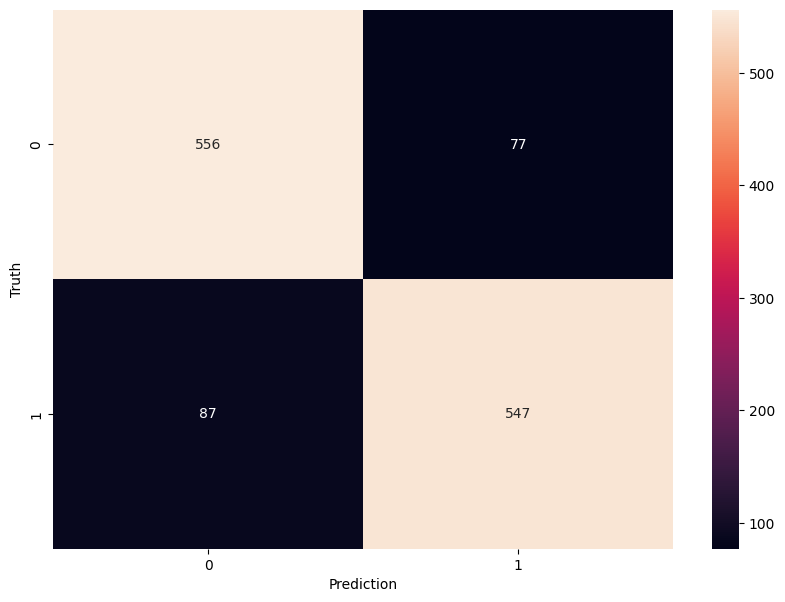

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# ***fastText***

In [ ]:
# units on which neural net is trained is CHARACTER n GRAM
# out of voc tackled to some extent -> portions of word already seen
# often a first choice when you want to train custom word embeddings for your domain -> solid baseline at less cost (less gpu consumed)
# fastTest is a technique (similar to word2vec) as well as a library 

# any NLP -> fastText

In [ ]:
# download 4gb model of english 
# model_en = fasttext.load_model("path")
# fasttest.train_unsurpised("sdsd.txt")
 